In [1]:
path = %pwd
print(path)

c:\python\20191207-yyyymmdd-第四階段-假日\20200208-day7\AM


In [2]:
import ast , numpy as np
with open('train_data.txt') as f:
    train_data = np.array(ast.literal_eval(f.read())).astype('float32')

with open('train_labels.txt') as f:
    train_labels = np.array(ast.literal_eval(f.read())).astype('int')
    

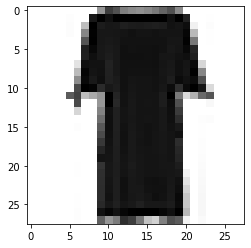

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(train_data[2, :, :, :].reshape(28, 28), cmap='gray_r')
plt.show()

In [4]:
# 檢查數據狀況
train_data.shape, train_labels.shape, train_labels[:1]

((50, 28, 28, 1), (50, 3), array([[0, 1, 0]]))

In [5]:
# 建立 model 
# the Sequential model
# the Model class used with the functional API.

In [6]:
# the Sequential model type II
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, MaxPooling2D, Dropout

model = Sequential()
model.add( Conv2D(filters= 5, kernel_size=(2,2), activation='relu', padding='same', input_shape=(28, 28, 1)) )
#model.add( Dropout(0.25) )
model.add( Conv2D(filters= 5, kernel_size=(2,2), activation='relu', padding='same') )
#model.add( Dropout(0.25) )
model.add( Conv2D(filters= 5, kernel_size=(2,2), activation='relu', padding='same') )
model.add( Flatten())

model.add( Dense(units= 32, activation='relu', input_dim=784) )
model.add( Dense(units= 3, activation='softmax') )
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 5)         25        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 5)         105       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 5)         105       
_________________________________________________________________
flatten_1 (Flatten)          (None, 3920)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                125472    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 125,806
Trainable params: 125,806
Non-trainable params: 0
________________________________________________

In [7]:
# dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
# Keras : 2.3.0
# https://keras.io/callbacks/#earlystopping

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
checkpoint = ModelCheckpoint('weights.hdf5', monitor='accuracy', save_best_only=True, verbose=1) # 顯示變更部分
earlystopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1) # 針對3次 val_accuracy 沒有改變就自動停止
callbacks_list = [earlystopping, checkpoint]

In [8]:
# 編譯
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# <keras.callbacks.callbacks.History at 0x1b93db60748>
history = model.fit(train_data, train_labels, batch_size=10, 
                    epochs=100, 
                    verbose=1, 
                    validation_split=0.2, 
                    callbacks = callbacks_list)

Train on 40 samples, validate on 10 samples
Epoch 1/100
40/40 [==============================] - 2s 52ms/step - loss: 1.0101 - accuracy: 0.5000 - val_loss: 0.8413 - val_accuracy: 0.9000

Epoch 00001: accuracy improved from -inf to 0.50000, saving model to weights.hdf5
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.7850 - accuracy: 0.9500 - val_loss: 0.6284 - val_accuracy: 1.0000

Epoch 00002: accuracy improved from 0.50000 to 0.95000, saving model to weights.hdf5
Epoch 3/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5649 - accuracy: 0.9500 - val_loss: 0.4686 - val_accuracy: 1.0000

Epoch 00003: accuracy did not improve from 0.95000
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3797 - accuracy: 0.9250 - val_loss: 0.2885 - val_accuracy: 1.0000

Epoch 00004: accuracy did not improve from 0.95000
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2306 - accuracy: 0.9750 - val_loss: 0.1897 

In [9]:
# <keras.callbacks.callbacks.History at 0x1b93db60748>
history.history.keys()
# history.history.get('loss'), history.history.get('accuracy')

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

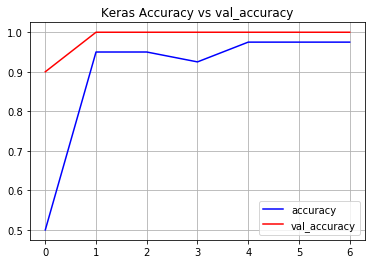

In [10]:
import matplotlib.pyplot as plt
plt.title('Keras Accuracy vs val_accuracy')

plt.plot(history.history.get('accuracy'), color='blue')
plt.plot(history.history.get('val_accuracy'), color='red')
plt.legend(['accuracy', 'val_accuracy'])

plt.grid()
plt.show()

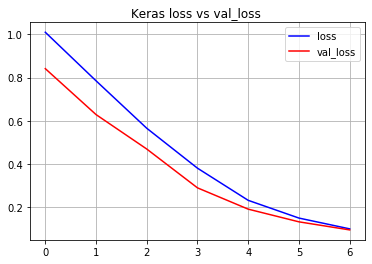

In [11]:
import matplotlib.pyplot as plt
plt.title('Keras loss vs val_loss ')
plt.plot(history.history.get('loss'), color='blue')
plt.plot(history.history.get('val_loss'), color='red')
plt.legend(['loss', 'val_loss'])
plt.grid()
plt.show()

In [12]:
model.evaluate(train_data, train_labels)[1] * 100.0

50/50 [==============================] - 0s 8ms/step


100.0

In [13]:
# 找出過去幾次訓練中的最佳參數

model.load_weights('weights.hdf5')
np.sum(model.predict_classes(train_data[:]) == np.argmax(train_labels, axis=1)) / len(train_data) * 100

98.0

In [14]:
# 檢視載入權重
model.weights

[<tf.Variable 'conv2d_1/kernel:0' shape=(2, 2, 1, 5) dtype=float32, numpy=
 array([[[[-0.00132651,  0.44768515,  0.4399618 , -0.28560576,
           -0.40219882]],
 
         [[-0.3078849 ,  0.1993703 , -0.14662048, -0.41825694,
            0.28909832]]],
 
 
        [[[-0.1689115 , -0.4172178 ,  0.03266909,  0.22001922,
           -0.0095838 ]],
 
         [[ 0.12901779, -0.24739176,  0.47713473, -0.07694238,
            0.18446273]]]], dtype=float32)>,
 <tf.Variable 'conv2d_1/bias:0' shape=(5,) dtype=float32, numpy=
 array([-0.00763541,  0.00201584,  0.00469744,  0.00528336,  0.00261961],
       dtype=float32)>,
 <tf.Variable 'conv2d_2/kernel:0' shape=(2, 2, 5, 5) dtype=float32, numpy=
 array([[[[ 0.011357  , -0.16928178,  0.31637937, -0.2710941 ,
           -0.19436812],
          [ 0.32659248, -0.15542917, -0.00579313,  0.21889137,
           -0.2912844 ],
          [-0.12431192,  0.01272638,  0.1636581 , -0.08609552,
            0.15759331],
          [ 0.14515008,  0.37395906, -0